# k-Means Clustering
This notebook shows simple examples of k-means clustering, the elbow/knee analysis used to select the most adequate number of clusters, and some examples of the known limitations of k-means.

We start by importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist

import matplotlib
%matplotlib inline

# color palette 
color_palette1 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')
color_palette2 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')

## Simple k-Means
To show some examples of k-means we create an artificial dataset comprising three blobs.

In [2]:
random_state = 1234 ## another interesting example can be generated using the seed 36
n_clusters = 3
n_samples = 1500

x, y = make_blobs(centers=n_clusters, n_samples=n_samples, random_state=random_state)

Let's plot the blobs!

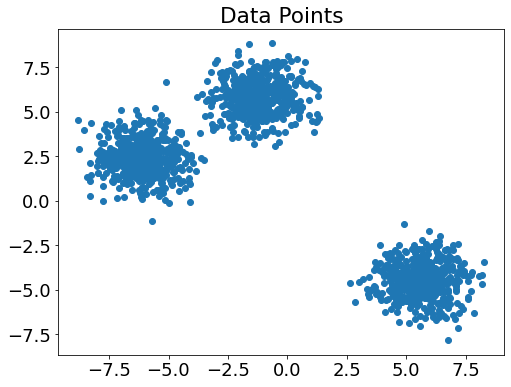

In [3]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0], x[:,1], cmap=color_palette1);
plt.title("Data Points");

First, we apply k-means with the correct number of clusters (k=3)

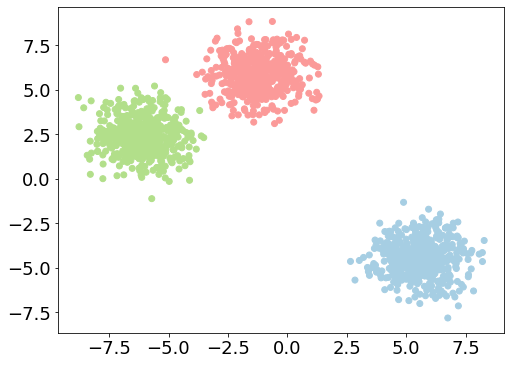

In [4]:
yp = KMeans(n_clusters=3).fit_predict(x)
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1],c=yp,cmap=color_palette1);

Next, we apply k-means with different values of k and plot the result.

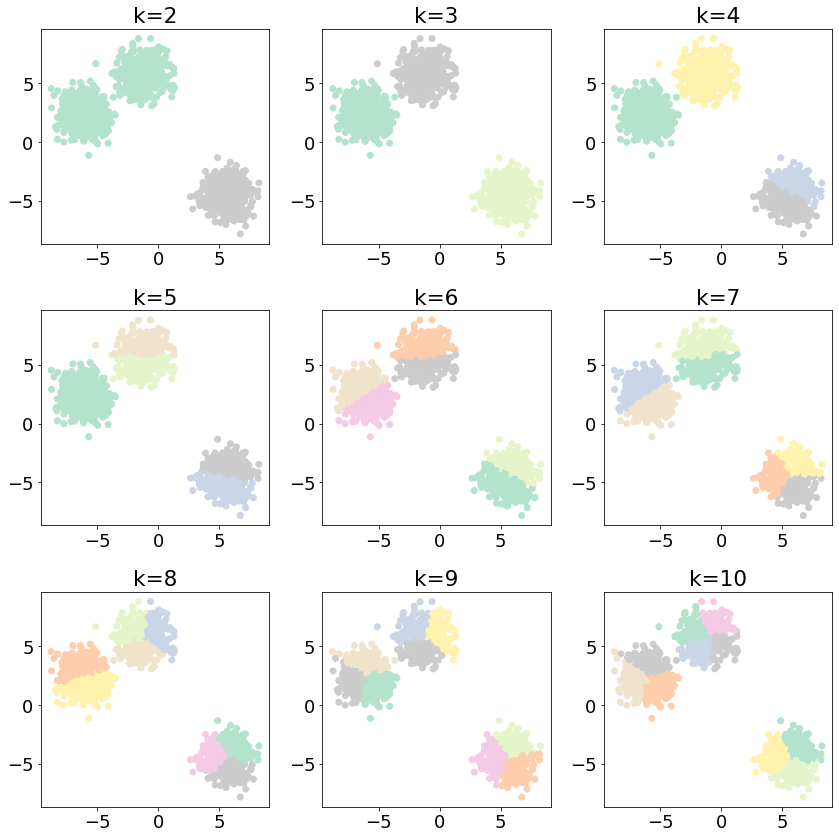

In [8]:
plt.figure(figsize=(12, 12));

for i in range(9):
    yp = KMeans(n_clusters=(i+2)).fit_predict(x)
    plt.subplot(330+(i+1))
    plt.title('k='+str(i+2))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap('Pastel2'))
    
plt.tight_layout()

## Knee/Elbow Analysis

In [11]:
def KneeElbowAnalysis(x, max_k=20):
    k_values = range(1, max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state).fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.xticks(k_values)
    plt.plot(k_values, wcss, 'o-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'o-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering');


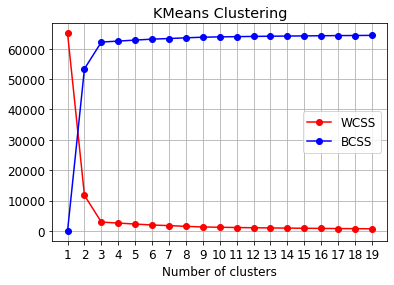

In [12]:
KneeElbowAnalysis(x)